<a href="https://colab.research.google.com/github/SrinithiReshma/datascience_colab/blob/main/datascience_and_economics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')  # adjust encoding if needed


In [ ]:
# First few rows
print(df.head())

# Shape and data types
print(df.shape)
print(df.dtypes)

# Missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
df_copy = df.copy()

# Convert to datetime
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'])
df_copy['Ship Date'] = pd.to_datetime(df_copy['Ship Date'])

# Create new features from dates
df_copy['Order Month'] = df_copy['Order Date'].dt.month
df_copy['Order Day'] = df_copy['Order Date'].dt.day
df_copy['Ship Delay'] = (df_copy['Ship Date'] - df_copy['Order Date']).dt.days


In [ ]:
df_copy = df_copy.drop(columns=[
    'Row ID', 'Order ID', 'Order Date', 'Ship Date',
    'Customer ID', 'Customer Name', 'Product ID', 'Product Name'
])


In [ ]:
df_encoded = pd.get_dummies(df_copy, drop_first=True)


In [ ]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-10-1e55a9c97f08>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Profit', estimator=sum, ci=None, color='skyblue', label='Profit')
<ipython-input-10-1e55a9c97f08>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None, color='orange', alpha=0.6, label='Sales')


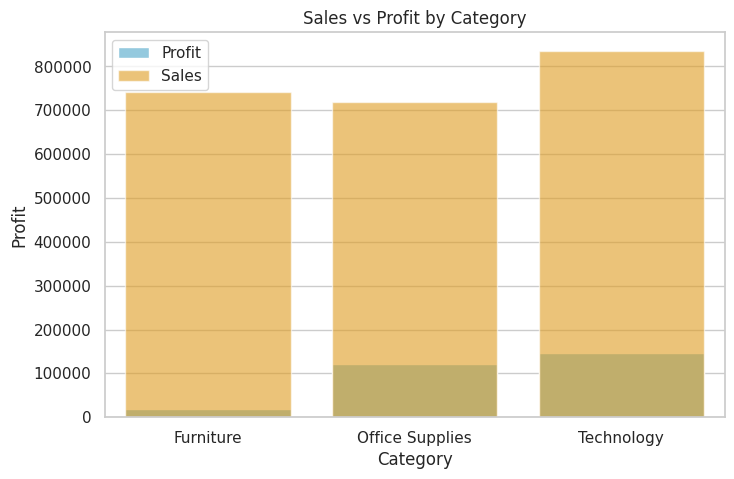

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Category', y='Profit', estimator=sum, ci=None, color='skyblue', label='Profit')
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, ci=None, color='orange', alpha=0.6, label='Sales')
plt.title('Sales vs Profit by Category')
plt.legend()
plt.show()


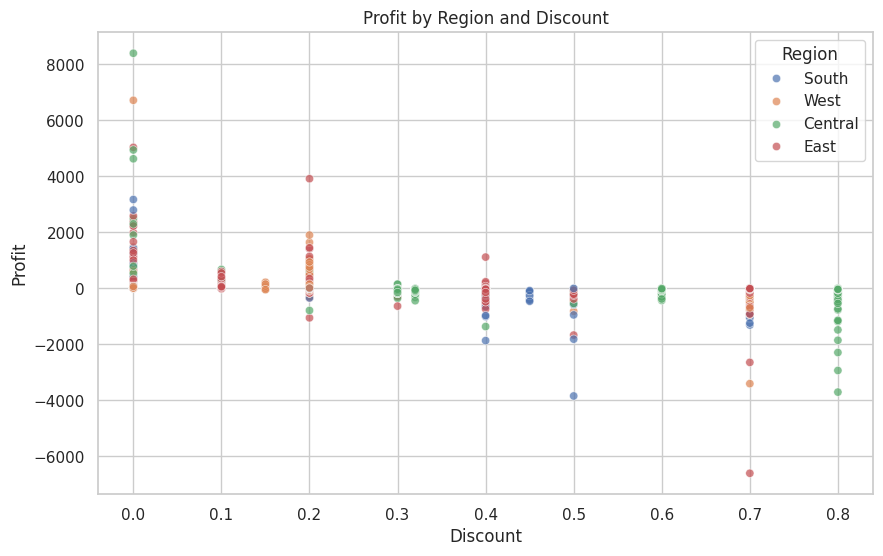

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Region', alpha=0.7)
plt.title('Profit by Region and Discount')
plt.show()


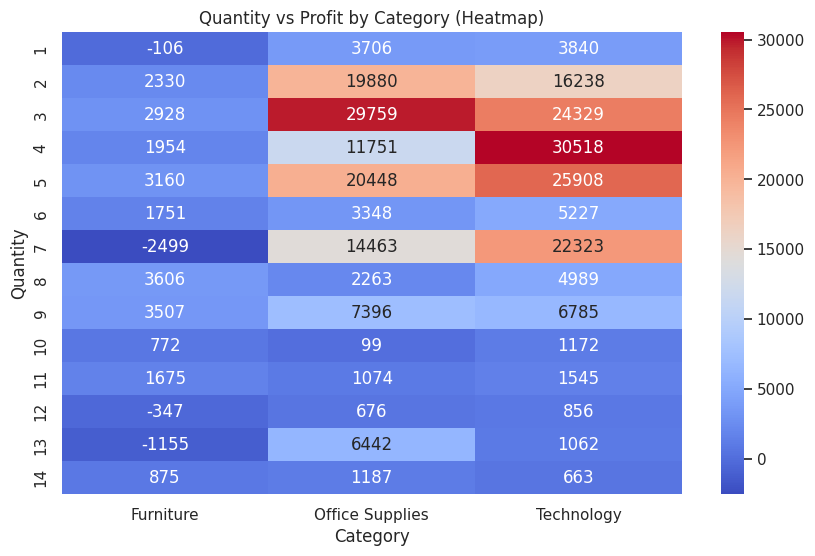

In [ ]:
heatmap_data = df.pivot_table(values='Profit', index='Quantity', columns='Category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Quantity vs Profit by Category (Heatmap)')
plt.show()


<ipython-input-13-8efb3689686e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ship Mode', order=df['Ship Mode'].value_counts().index, palette='Set2')


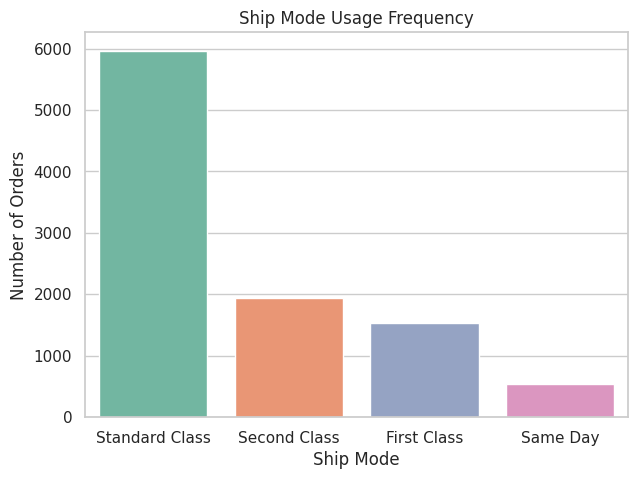

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Ship Mode', order=df['Ship Mode'].value_counts().index, palette='Set2')
plt.title('Ship Mode Usage Frequency')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
df[['Sales', 'Profit', 'Discount']].describe()


,Sales,Profit,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203
std,623.245101,234.260108,0.206452
min,0.444000,-6599.978000,0.000000
25%,17.280000,1.728750,0.000000
50%,54.490000,8.666500,0.200000
75%,209.940000,29.364000,0.200000
max,22638.480000,8399.976000,0.800000


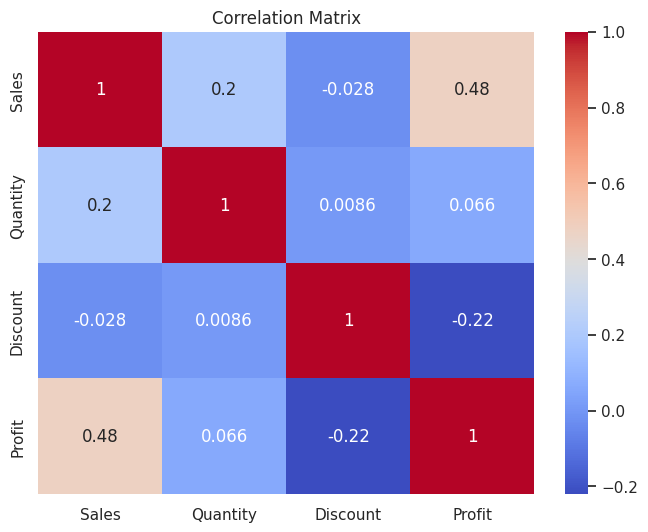

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


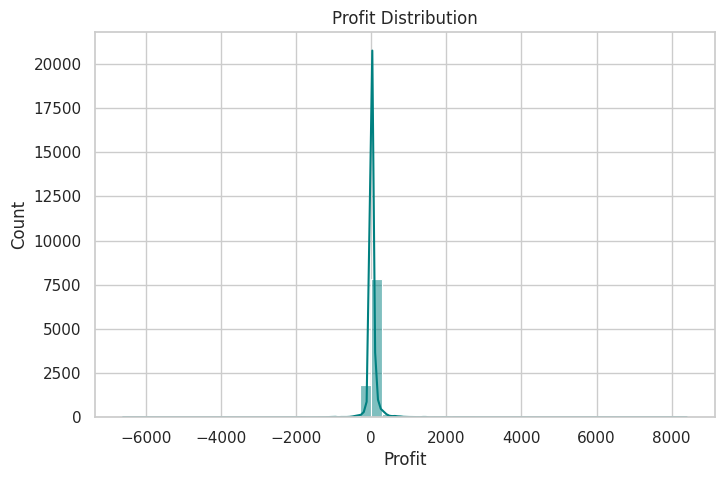

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit'], bins=50, kde=True, color='teal')
plt.title('Profit Distribution')
plt.show()


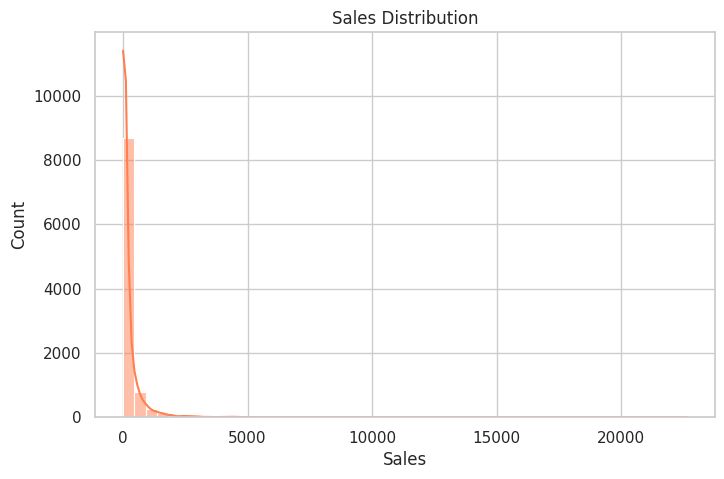

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=50, kde=True, color='coral')
plt.title('Sales Distribution')
plt.show()


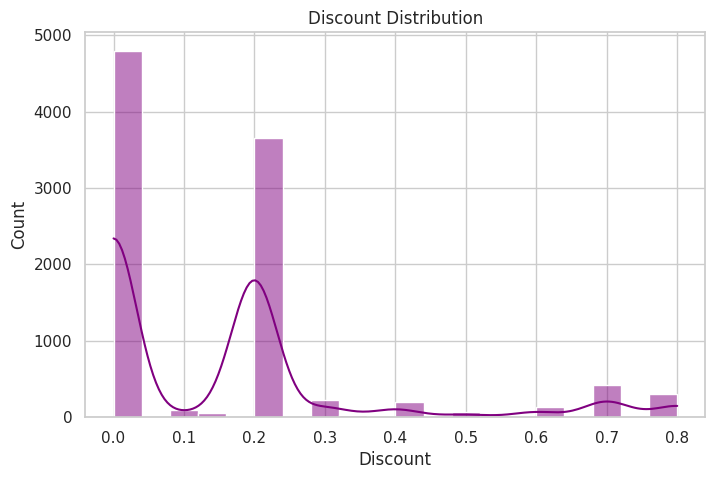

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount'], bins=20, kde=True, color='purple')
plt.title('Discount Distribution')
plt.show()


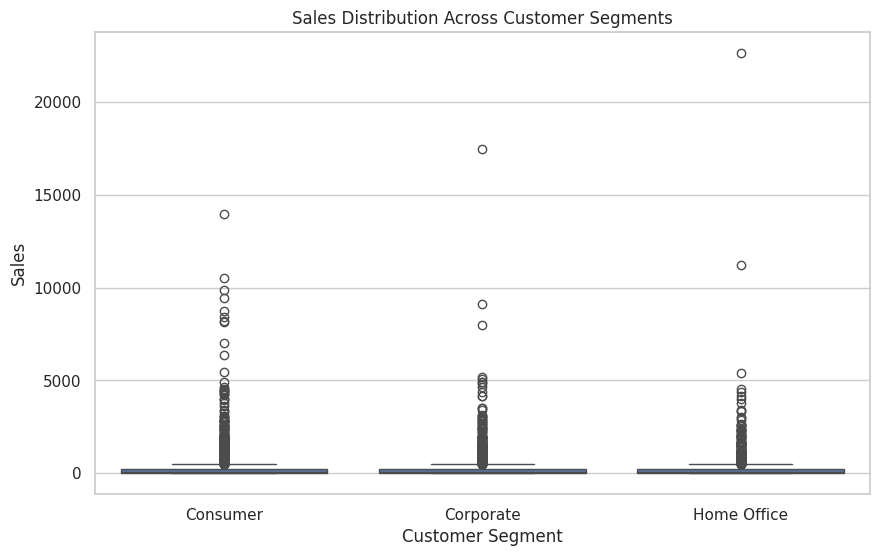

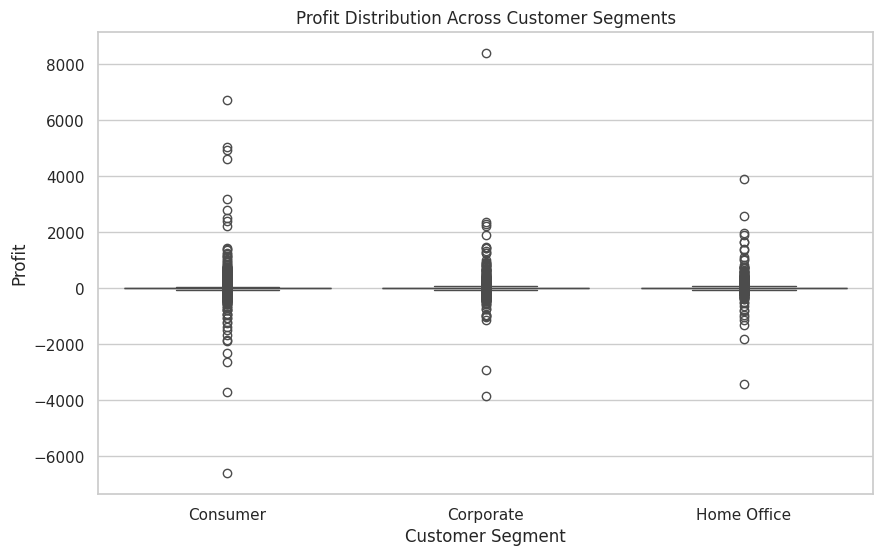

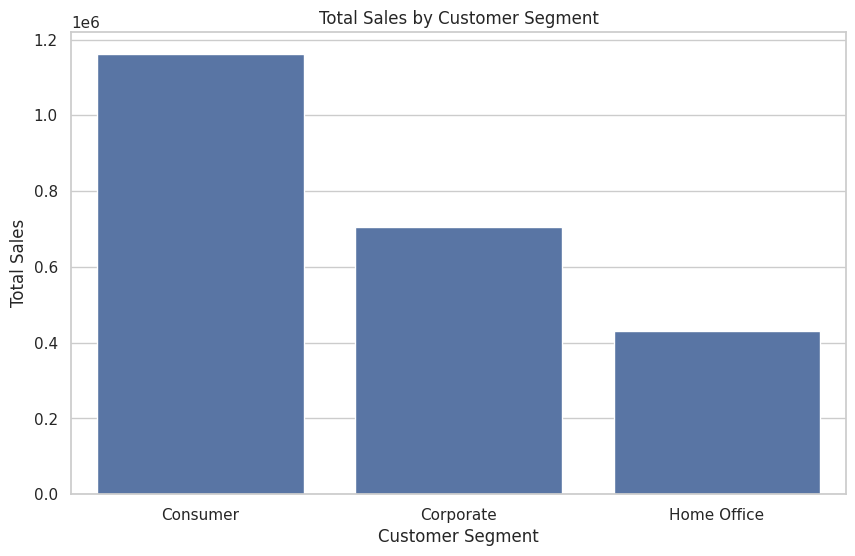

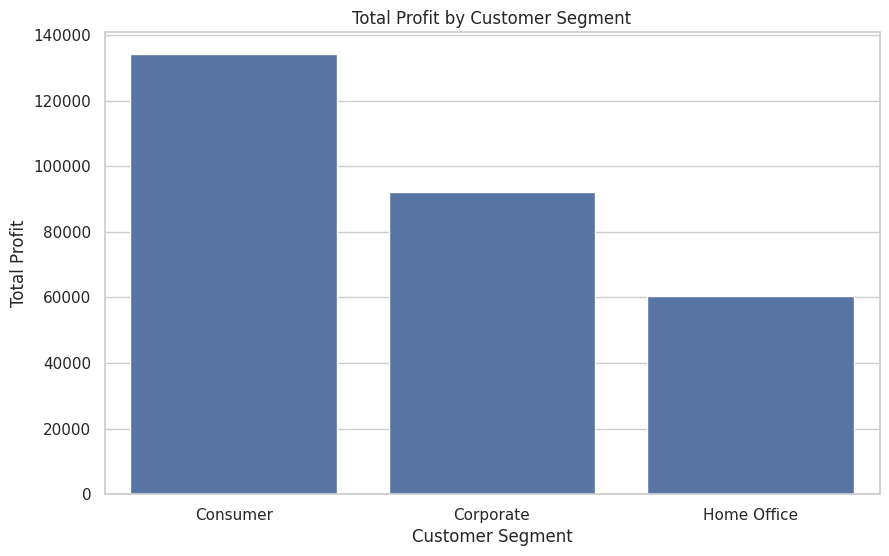

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Visualizing the distribution of sales across customer segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title('Sales Distribution Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

# Visualizing profit across customer segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Profit', data=df)
plt.title('Profit Distribution Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Profit')
plt.show()

# Visualizing the total sales by segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment)
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

# Visualizing the total profit by segment
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=profit_by_segment)
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')
sub_categories = df['Sub-Category'].unique()

print(sub_categories)
# Drop unnecessary columns for prediction
df = df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'City', 'State', 'Postal Code', 'Product ID', 'Product Name'])

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
df['Profit'] = imputer.fit_transform(df[['Profit']])

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['Segment'] = label_encoder.fit_transform(df['Segment'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Sub-Category'] = label_encoder.fit_transform(df['Sub-Category'])
df['Region'] = label_encoder.fit_transform(df['Region'])

# Features and target
X = df[['Sales', 'Quantity', 'Discount', 'Segment', 'Category', 'Sub-Category', 'Region']]
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [25]:
pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00


In [28]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
regressor = LazyRegressor()
models = regressor.fit(X_train, X_test, y_train, y_test)

print(models[0].columns)



  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of data points in the train set: 7995, number of used features: 7
[LightGBM] [Info] Start training from score 30.697456
Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')


In [29]:
best_model = models[0].sort_values('R-Squared', ascending=False)[['R-Squared']].head(1)
best_model_name = best_model.index[0]  # Model name is in the index
print(f'Best model: {best_model_name}')


Best model: XGBRegressor


In [30]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming you’ve already cleaned and preprocessed your data into X (features) and y (target: Profit)
# Example:
# X = df[['Category', 'Quantity', 'Discount', ...]]  (after encoding if needed)
# y = df['Profit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
model = XGBRegressor()
model.fit(X_train, y_train)

# Save the model
with open('best_profit_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [31]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Assuming you’ve already cleaned and preprocessed your data into X (features) and y (target: Profit)
# Example:
# X = df[['Category', 'Quantity', 'Discount', ...]]  (after encoding if needed)
# y = df['Profit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
model = XGBRegressor()
model.fit(X_train, y_train)

# Save the model
with open('best_profit_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [32]:
sub_categories = df['Sub-Category'].unique()

print(sub_categories)

[ 4  5 10 16 14  9  2 13  3  1 12  0  7  8 15 11  6]
